## DATA 601 - Final Project - Alternative Fueling Station Locations in 2012 and 2014

Dataset Name:  Alternative Fueling Station Locations in 2012 (as of April 4, 2012) and 2014 (as of April 23, 2015)

Description: https://openei.org/datasets/dataset/alternative-fueling-station-locations

CSV links:

(as of April 23, 2015) 2014: https://openei.org/doe-opendata/dataset/cbb80cd9-1dcc-48a1-ad88-f653a621a1e6/resource/44bdb515-eb8e-43d4-8994-a92f584ae5ac/download/04232015altfuelstations.csv

Rows: 20,329 + 1 header

Columns: 38  

Size: 4.97 MB  

(as of April 4, 2012) 2012: https://openei.org/doe-opendata/dataset/cbb80cd9-1dcc-48a1-ad88-f653a621a1e6/resource/d4e6d771-d7ea-43d6-949d-8f1ce42dd10e/download/altfuelstationsapr42012.csv

Rows: 10,458 + 1 header

Columns: 28

Size: 2.15 MB

Cost: Free

It has more than 2 data types.

I found these datasets on the https://openei.org website. I had searched for the keywords "electricity generation csv" in Google and this was the first website that came up.

The datasets have records for alternative fueling stations are located throughout the United States. I have no prior training in the data. I chose this dataset as I am interested in knowing how the trend is changing to alternative fuels. If the number of users for alternative fuels has increased then the number of alternative fueling stations should have increased.

### Hypothesis

The data has column "Fuel Type Code" which would provide the number of the type of alternative fueling stations available in the years 2012 and 2014.

1. The total number of alternative fueling stations should have doubled.
#### TRUE


2. There should also be an increase of 50% in electric fueling stations and a decrease of 50% in CNG fueling stations.
#### Partially true as there was an increase in both electric and CNG fueling stations

### Questions:

I would like to know

1. Which states are having the highest alternative fueling stations?
#### California has the highest number of alternative fueling stations and Texas has the second highest alternative fueling stations.


2. What is the trend in the alternative fueling stations? Are the private stations increasing or the public stations?
#### Both Private and Public alternative fueling stations have increased over the years from 2012 to 2014.

In [1]:
#Intializing libraries

import warnings
warnings.filterwarnings('ignore')

import time
import datetime
import matplotlib.pyplot as plt
import pandas as pd
print('Pandas',pd.__version__)

Pandas 1.0.3


In [2]:
start_time = time.time()

In [3]:
#Reading CSV

start_time = time.time()
df_2012 = pd.read_csv("https://openei.org/doe-opendata/dataset/cbb80cd9-1dcc-48a1-ad88-f653a621a1e6/resource/d4e6d771-d7ea-43d6-949d-8f1ce42dd10e/download/altfuelstationsapr42012.csv", low_memory=False)
df_2014 = pd.read_csv("https://openei.org/doe-opendata/dataset/cbb80cd9-1dcc-48a1-ad88-f653a621a1e6/resource/44bdb515-eb8e-43d4-8994-a92f584ae5ac/download/04232015altfuelstations.csv", low_memory=False)
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

In [4]:
df_2012.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID
0,CNG,Alagasco Tuscaloosa Operations Center,5220 Metro Park Dr,NaN,Tuscaloosa,AL,35405,NaN,NaN,E,NaN,Private access only,NaN,NaN,NaN,B,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,33.161768,-87.556760,2011-08-31,14
1,CNG,Alagasco Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,NaN,Private access only,NaN,NaN,NaN,B,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,32.367163,-86.267396,2011-08-31,17
2,CNG,Fort Gordon,105th Ave,Building 61300,Fort Gordon,GA,30905,NaN,NaN,E,NaN,Private - government only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200-6,33.413446,-82.176044,2011-10-31,25
3,CNG,Clayton County Fleet Maintenace,1348 Government Cir,I-75 south of Atlanta to State Route 138,Jonesboro,GA,30236,5907.0,NaN,E,NaN,Private - government only,NaN,NaN,NaN,Q,3000,NaN,NaN,NaN,NaN,NaN,NaN,200-8,33.535725,-84.346895,2011-06-30,40
4,CNG,Clean Energy - PS Energy - UFO,340 Whitehall St SW,"From I-7585 N, exit 91 to Central Avenue, left...",Atlanta,GA,30303,3718.0,404-321-5711,E,NaN,Private - fleet customers only,Contact Andrea Whisenhunt at 404-321-5711 for ...,FuelMan Voyager Wright_Exp,NaN,Q,3000,NaN,NaN,NaN,NaN,NaN,NaN,200-8,33.745474,-84.400021,2011-06-30,42


In [5]:
#df_2012.shape

In [6]:
#Adding a new cloumn with value of the year (2012). It will be used to differentiate between the data.

df_2012['Data Year'] = 2012

In [7]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10458 entries, 0 to 10457
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           10458 non-null  object 
 1   Station Name             10458 non-null  object 
 2   Street Address           10421 non-null  object 
 3   Intersection Directions  4242 non-null   object 
 4   City                     10458 non-null  object 
 5   State                    10458 non-null  object 
 6   ZIP                      10458 non-null  int64  
 7   Plus4                    1641 non-null   float64
 8   Station Phone            8784 non-null   object 
 9   Status Code              10458 non-null  object 
 10  Expected Date            434 non-null    object 
 11  Groups With Access Code  10458 non-null  object 
 12  Access Days Time         9034 non-null   object 
 13  Cards Accepted           5605 non-null   object 
 14  BD Blends             

In [8]:
#df_2012.isna().sum()

In [9]:
df_2014.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types
0,LPG,Irish Propane,70 Katherine St,At Bailey and Clinton,Buffalo,NY,14210,NaN,716-852-3335,E,NaN,Public,8am-4:45pm M-F,Cash A D M V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPS,42.859400,-78.858933,2015-04-03,13444,2015-04-03 16:57:34 UTC,P,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
1,ELEC,Latitudes,2401 Highway 528,NaN,Rio Rancho,NM,87124,NaN,505-369-7777,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,200-8,35.218430,-106.663000,2015-01-06,50083,2015-01-06 17:43:46 UTC,P,NaN,NaN,2012-08-01,NaN,NaN,NaN,NaN,J1772
2,ELEC,American Bush - Solar Canopy,2630 S 300 W,Located across from Tire World,Salt Lake City,UT,84115,NaN,801-518-3529,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,200-8,40.714420,-111.900105,2015-01-06,42013,2015-01-06 17:47:30 UTC,P,NaN,NaN,2011-12-01,NaN,NaN,NaN,NaN,J1772
3,ELEC,McDonald's #31850 - Flower Mound TX,3601 FM 407,NaN,Flower Mound,TX,75028,NaN,888-998-2546,E,NaN,Public,MON: 24 hours | TUE: 24 hours | WED: 24 hours ...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Blink Network,http://www.blinknetwork.com/,GPS,33.071809,-97.085119,2015-04-23,63495,2015-04-23 07:09:51 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J1772
4,ELEC,CITY OF SEATTLE,600 Pine St,NaN,Seattle,WA,98101,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,ChargePoint Network,http://www.mychargepoint.net/,200-8,47.612514,-122.335409,2015-04-23,43306,2015-04-23 07:54:36 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J1772


In [10]:
#df_2014.shape

In [11]:
#Adding a new cloumn with value of the year (2014). It will be used to differentiate between the data.

df_2014['Data Year'] = 2014

In [12]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20329 entries, 0 to 20328
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           20329 non-null  object 
 1   Station Name             20329 non-null  object 
 2   Street Address           20299 non-null  object 
 3   Intersection Directions  4359 non-null   object 
 4   City                     20329 non-null  object 
 5   State                    20329 non-null  object 
 6   ZIP                      20329 non-null  int64  
 7   Plus4                    0 non-null      float64
 8   Station Phone            17866 non-null  object 
 9   Status Code              20329 non-null  object 
 10  Expected Date            461 non-null    object 
 11  Groups With Access Code  20328 non-null  object 
 12  Access Days Time         17417 non-null  object 
 13  Cards Accepted           7004 non-null   object 
 14  BD Blends             

In [13]:
#df_2014.isna().sum()

In [14]:
#Combining the data from 2012 and 2014 into a new dataframe and I am considering only the columns that are required for my analysis.

df = pd.concat([df_2012[['Data Year', 'Fuel Type Code', 'Station Name', 'City' , 'State', 'ZIP', 'Groups With Access Code', 'Latitude', 'Longitude']],
                df_2014[['Data Year', 'Fuel Type Code', 'Station Name', 'City' , 'State', 'ZIP', 'Groups With Access Code', 'Latitude', 'Longitude']]])

In [15]:
#df.shape

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30787 entries, 0 to 20328
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Year                30787 non-null  int64  
 1   Fuel Type Code           30787 non-null  object 
 2   Station Name             30787 non-null  object 
 3   City                     30787 non-null  object 
 4   State                    30787 non-null  object 
 5   ZIP                      30787 non-null  int64  
 6   Groups With Access Code  30786 non-null  object 
 7   Latitude                 30787 non-null  float64
 8   Longitude                30787 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.3+ MB


### Data Cleaning

In [17]:
df.isna().sum()

Data Year                  0
Fuel Type Code             0
Station Name               0
City                       0
State                      0
ZIP                        0
Groups With Access Code    1
Latitude                   0
Longitude                  0
dtype: int64

There is only one nan value in "Groups With Access Code" column.

In [18]:
df['Groups With Access Code'].value_counts()

Public                                                              11842
Public - see hours                                                   6081
Private                                                              2775
Public - Call ahead                                                  2011
Private access only                                                  1081
Public - Credit card at all times                                     981
Private - Government only                                             815
Public - call ahead                                                   776
Public - Card key at all times                                        772
Private - government only                                             749
Public - credit card at all times                                     561
Public - Credit card after hours                                      450
PLANNED - not yet accessible                                          437
Public - credit card after hours      

There is only one nan value in "Groups With Access Code" column. As there are more number of Public access alternative fueling stations, replacing nan with Public.

In [19]:
df['Groups With Access Code'].fillna('Public', inplace=True)

In [20]:
df.isna().sum()

Data Year                  0
Fuel Type Code             0
Station Name               0
City                       0
State                      0
ZIP                        0
Groups With Access Code    0
Latitude                   0
Longitude                  0
dtype: int64

Categorizing the values in "Groups With Access Code" column into 3 categories (Public, Private, Planned). This will help to answer my questions.

In [21]:
#ref: https://stackoverflow.com/questions/30953299/pandas-if-row-in-column-a-contains-x-write-y-to-row-in-column-b

df['Groups With Access Code'][df['Groups With Access Code'].str.contains('Public')] = 'Public'
df['Groups With Access Code'][df['Groups With Access Code'].str.contains('Private')] = 'Private'

In [22]:
df['Groups With Access Code'][df['Groups With Access Code'].str.contains('PLANNED')] = 'Planned'

In [23]:
df['Groups With Access Code'].value_counts()

Public     24683
Private     5667
Planned      437
Name: Groups With Access Code, dtype: int64

The data from 2012 csv file is as of April 4, 2012.

In the 2014 csv file, the data is as of April 23, 2015. This means that there could be same data in both the input files.

So I am removing duplicated rows based on all the columns except for the "Year Data".

In between the years 2012 and 2014, there is possibiblty that a fuel station could have:
 - converted from one type of alternative fuel to another (example: LPG to ELEC)
 - changed its access type (example: Private to Public)
 
I am not considering these rows as duplicates as they are valid.

In [24]:
#ref: https://stackoverflow.com/questions/55013957/pandas-removing-duplicates-based-on-selected-columns

df1 = df.sort_values(by = ['Fuel Type Code', 'Station Name', 'City' , 'State', 'ZIP', 'Groups With Access Code', 'Latitude', 'Longitude']).drop_duplicates(subset=['Fuel Type Code', 'Station Name', 'City' , 'State', 'ZIP', 'Groups With Access Code', 'Latitude', 'Longitude'], keep='first')

In [25]:
df1.shape

(29454, 9)

In [26]:
df1.head()

,Data Year,Fuel Type Code,Station Name,City,State,ZIP,Groups With Access Code,Latitude,Longitude
3873,2012,BD,76 Station - Niu Valley 7-Eleven,Honolulu,HI,96821,Public,21.282649,-157.735212
8228,2014,BD,76th Street Truck Stop - J&H Family Stores,Byron Center,MI,49315,Public,42.825953,-85.674869
2112,2012,BD,A & A Foodmart Chevron,Bellevue,WA,98007,Public,47.595611,-122.150162
11211,2014,BD,A&M Oil Co,Taylorsville,KY,40071,Public,38.026660,-85.343274
6921,2012,BD,AG Plus,Fort Wayne,IN,46808,Public,41.120940,-85.157454


In [27]:
#Checking data characteristics for columns with numerical values

df1.describe()

,Data Year,ZIP,Latitude,Longitude
count,29454.000000,29454.000000,29454.000000,29454.000000
mean,2013.290555,58336.530658,38.053913,-96.162392
std,0.956875,29034.496846,5.200061,17.264140
min,2012.000000,1002.000000,19.609150,-159.475426
25%,2012.000000,33180.000000,34.053226,-112.099347
50%,2014.000000,58578.000000,38.643715,-92.321450
75%,2014.000000,85374.000000,41.864113,-82.730013
max,2014.000000,99929.000000,64.812235,-5.170103


In [28]:
#Checking data characteristics for columns with non-numerical values

df1.describe(include='object')

,Fuel Type Code,Station Name,City,State,Groups With Access Code
count,29454,29454,29454,29454,29454
unique,7,17075,5013,51,3
top,ELEC,U-Haul,Los Angeles,CA,Public
freq,14393,948,281,4667,23661


### Hypothesis 1

The total number of alternative fueling stations should have doubled.



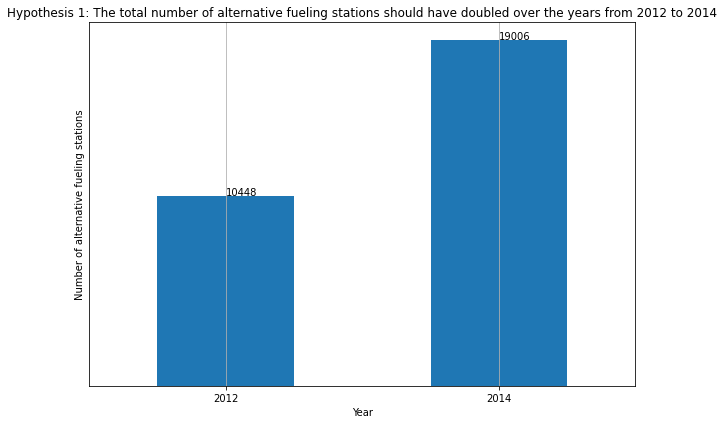

In [29]:
year_order = df1['Data Year'].unique()
year_order.sort()

df1['Data Year'].value_counts().loc[year_order].plot.bar(grid=True, rot=0, figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Number of alternative fueling stations')
plt.yticks([])
for index,data in enumerate(df1['Data Year'].value_counts().loc[year_order]):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.title('Hypothesis 1: The total number of alternative fueling stations should have doubled over the years from 2012 to 2014')
plt.tight_layout()

The total number of alternative fueling stations over the years from 2012 to 2014 have increased from 10448 to 19006 which is almost 90% increase. 

So my hypothesis 1 is of true.

I should also consider the fact that the data of the alternative fueling stations are only the ones that were reported. There might be other alternative fueling stations that were not reported.

### Hypothesis 2

There should also be an increase of 50% in electric fueling stations and a decrease of 50% in CNG fueling stations.



In [30]:
df2 = df1['Data Year'].groupby(df1['Fuel Type Code']).value_counts().unstack().fillna(0)

In [31]:
df2

Data Year,2012,2014
Fuel Type Code,,
BD,655,667
CNG,1069,1681
E85,2533,2697
ELEC,3309,11084
HY,56,71
LNG,145,176
LPG,2681,2630


Text(0.5, 1.0, 'Hypothesis 2: There should also be an increase of 50% in electric fueling stations and a decrease of 50% in CNG fueling stations over the years from 2012 to 2014')

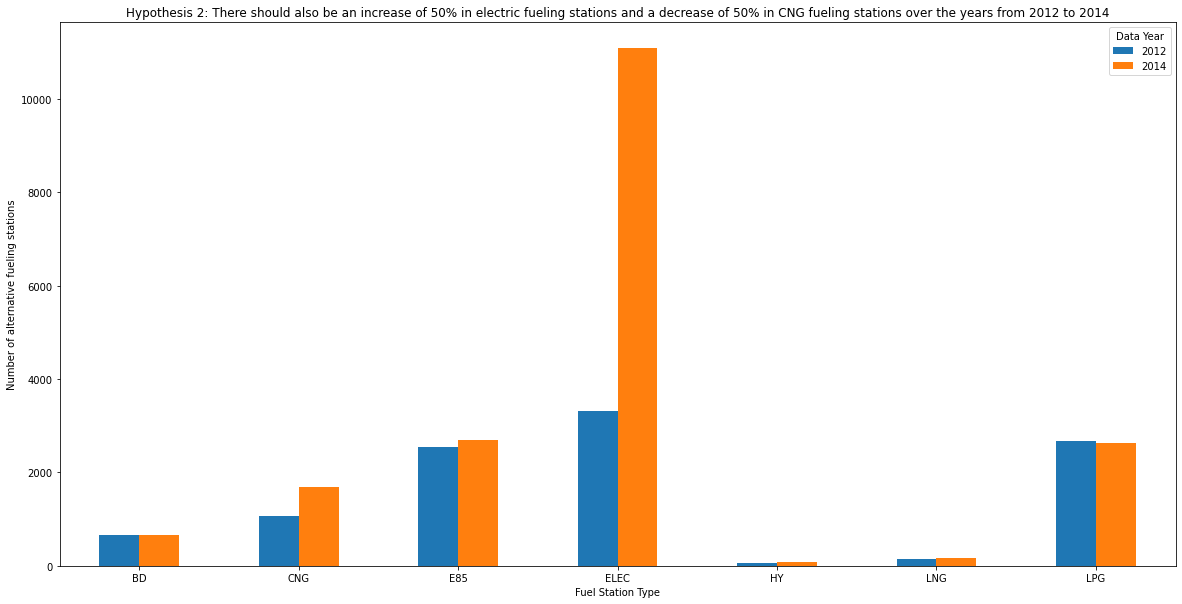

In [32]:
df2.plot.bar(rot=0, figsize=(20,10))
plt.xlabel('Fuel Station Type')
plt.ylabel('Number of alternative fueling stations')
plt.title('Hypothesis 2: There should also be an increase of 50% in electric fueling stations and a decrease of 50% in CNG fueling stations over the years from 2012 to 2014')

There is increase both electric and CNG fueling station over the years from 2012 to 2014.

So my hypothesis 2 is partially true.

I should also consider the fact that the data of the alternative fueling stations are only the ones that were reported. There might be other alternative fueling stations that were not reported.

### Question 1

Which states are having the highest alternative fueling stations?

In [33]:
df3 = df1['Data Year'].groupby(df1['State']).value_counts().unstack().fillna(0)

In [34]:
#df3

Text(0.5, 1.0, 'Question 1: Which states are having the highest alternative fueling stations?')

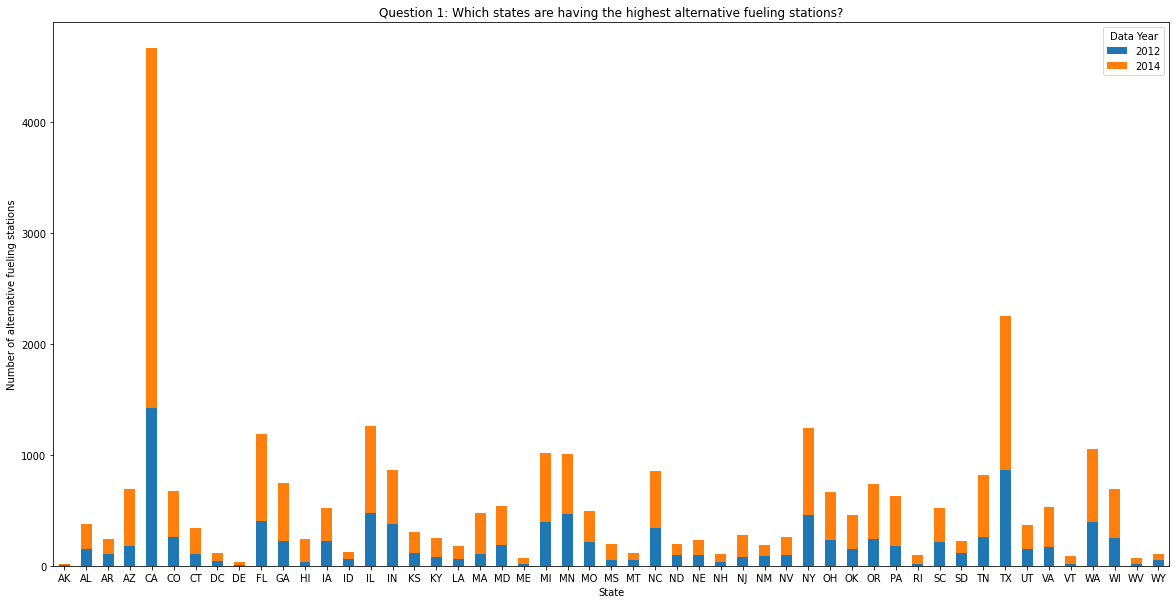

In [35]:
df3.plot.bar(stacked = True, rot=0, figsize=(20,10))
plt.xlabel('State')
plt.ylabel('Number of alternative fueling stations')
plt.title('Question 1: Which states are having the highest alternative fueling stations?')

California has the highest number of alternative fueling stations and Texas has the second highest alternative fueling stations.

### Question 2

What is the trend in the alternative fueling stations? Are the private stations increasing or the public stations?

In [36]:
df4 = df1['Data Year'].groupby(df1['Groups With Access Code']).value_counts().unstack().fillna(0)

In [37]:
#df4

Text(0.5, 1.0, 'Question 2: What is the trend in the alternative fueling stations? Are the private stations increasing or the public stations? over the years from 2012 to 2014')

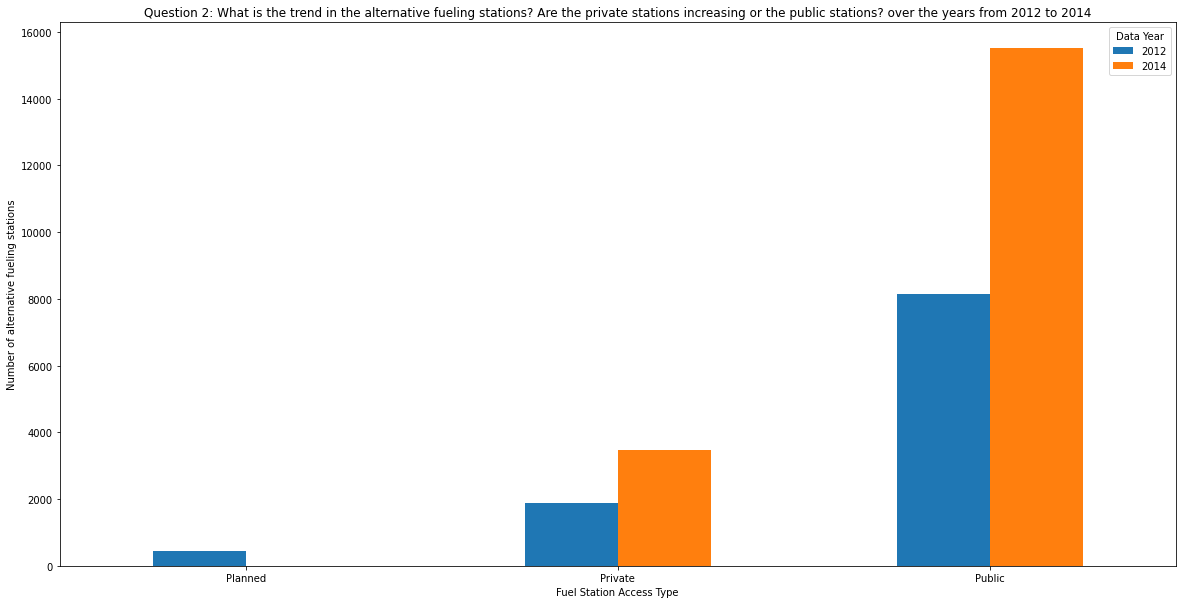

In [38]:
df4.plot.bar(rot=0, figsize=(20,10))
plt.xlabel('Fuel Station Access Type')
plt.ylabel('Number of alternative fueling stations')
plt.title('Question 2: What is the trend in the alternative fueling stations? Are the private stations increasing or the public stations? over the years from 2012 to 2014')

Both Private and Public alternative fueling stations have increased over the years from 2012 to 2014.

### Conclusion Story

There is significantly a very high increase in alternative fueling stations across the US. This means that people are converting to alternative fuels. Especially there are many electric fueling stations, which means that there are many electric vehicle users.

In this project, I have how to plot value counts from two different columns in a single graph.

In [39]:
#Total run time

print((time.time() - start_time)/60,'minutes')
print(time.time() - start_time,'seconds')

0.11505158344904581 minutes
6.904046535491943 seconds
